In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import math
import pandas as pd

In [ ]:
import perceptron_code
from utils import color_cycle

# Lecture 3: Perceptron

* Perceptron and linear separation
* Convergence of perceptron learning rule
* Capacity of the perceptron
* Generalization

_Recommended readings_:

* Hertz, Krogh, Palmer, & Horner, Introduction to the theory of neural computation (1991)
* Raul Rojas' [Neural Networks: A systematic introduction](https://link.springer.com/book/10.1007/978-3-642-61068-4) (1996)
* Michael Biehl's [The shallow and the deep](https://www.cs.rug.nl/~biehl/mpubl.html) (2023). Chapter 3 contains a very detailed account of perceptron learning, with additional training methods using concepts from convex optimization.
* Mohri, Rostamizadeh, Talwalkar, [Foundations of Machine Learning](https://cs.nyu.edu/~mohri/mlbook/). Chapter 2 and 3 contain a very readable account of the PAC framework and VC dimension.

## The Perceptron

$\xi=(\xi_1,...,\xi_d)$ is an array of $d$ input pixels, i.e., $\xi$ is the image.
$\phi_i(\xi), i=1,...,N-1$ is an array of (given) features computed for each image $\xi$.
$w=(w_0,w_1,... w_{N-1})$ is an array of $n$ adaptable parameters.

Given $\xi,w$ compute
$$y = \text{sign}\left(\sum_{i=1}^{N-1} w_i \phi_i(\xi) + w_0 \right)$$

## The Perceptron

##### Learning problem:
Given a training set of images $\xi^\mu, \mu = 1,... P$, where each image belongs to one of two classes labeled by $t^\mu =\pm 1$, find $w$ such that
$$\text{sign}\left(\sum_{i=0}^{N-1} w_i \phi_i^\mu\right)=t^\mu,\qquad \mu=1,...,P$$
where we write $\phi_i^\mu = \phi_i(\xi^\mu)$ and we have defined $\phi_0^\mu=1$.

Equivalently, we demand
$$\text{sign}\left(\sum_{i=0}^{N-1} w_i^\mu \phi_i^\mu t^\mu\right)=1\qquad\text{or}\quad w^T\cdot x^\mu >0$$
with $x_i^\mu=\phi_i^\mu t^\mu$.

## Linear separation

Classification depends on the sign of $w\cdot x$. Thus, the decision boundary is an $N-1$ dimensional hyperplane defined by:
$$0=\sum_{j=1}^{N-1} w_j \phi_j +w_0$$
All points of one class should be on one side of the hyperplane, and all others on the other side.
Thus, the perceptron can solve so-called **linearly separable problems**.

Examples: in 2 dimensions, the AND problem is linearly separable, whereas the XOR problem is not linearly separable.

In the following, we will consider points in **general position** in $N$ dimension, so that the bias $w_0$ is not a special weight and we index weight from $1$ to $N$ to reduce clutter.

## Perceptron learning rule

Learning is successful when
$$w\cdot x^\mu > 0,\quad \text{all patterns $\mu$}$$
Consider the following learning mechanism, where the weights are updated when a single input pattern $\phi^\mu$ and its output label $t^\mu$ are presented to the perceptron:

1.  Compute $x_i^\mu = \phi_i^\mu t^\mu$.
2.  When $w$ is such that $w \cdot x^\mu >0$ do nothing.
3.  else $w \to w+\eta x^\mu $.

$\eta>0$ is called the _learning rate_.

Note that $w \cdot x^\mu$ increases after update 3, indeed $w\cdot x^\mu \to (w+\eta x^\mu)\cdot x^\mu=w \cdot x^\mu + \eta |x^\mu|^2> w \cdot x^\mu $

## Perceptron learning rule

We can thus write the perceptron learning rule as:

$$w_i^\mathsf{new}=w_i^\mathsf{old}+\Delta w_i$$
$$\Delta w_i=\eta\Theta(-w\cdot x^\mu)x^\mu_i$$

where we used the [Heaviside function](https://en.wikipedia.org/wiki/Heaviside_step_function): $\Theta(x)=1$ if $x>0$ and $\Theta(x)=0$ otherwise.

## Perceptron learning rule

In [2]:
N = 100
alpha = 1.2
P = int(alpha * N)
learn_bias = False

X = np.random.randn(P, N)
y = np.random.randint(2, size=P)

if learn_bias:
    X = np.c_[X, np.ones((P,1))]

### Sequential implementation

In [3]:
# ... you will write your code here ...

solution found -> EXITING!


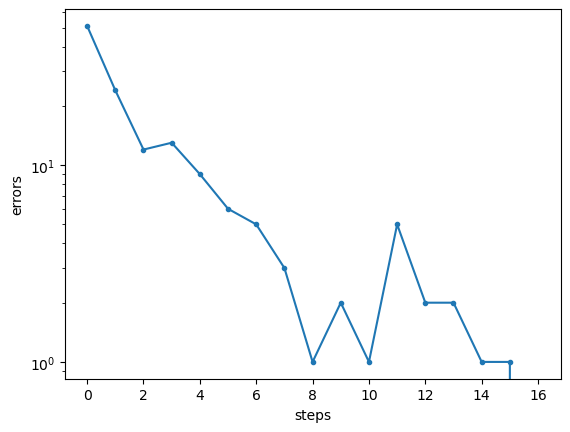

In [4]:
# set parameters
lr = 1.
num_epochs = 1000
print_every = 100


w, err, errs, ep = perceptron_code.train_perceptron(X, y, learn_bias=learn_bias, lr=lr, num_epochs=num_epochs,
                                                    print_every=print_every, verbose=True, parallel=False)

plt.plot(errs, '.-');
plt.xlabel('steps')
plt.ylabel("errors");
# plt.xscale('log');
plt.yscale('log');

## A parallel version of the perceptron learning rule

The perceptron learning rule is sequential, updating one pattern at a time, and requires a for loop.

```
for mu = 1: P
...
end;
```

You can make a faster parallel version:

1.  Find the set $S$ of training patterns with wrong output.
2.  Update $w$ using all patterns found in step 1.

### parallel implementation

In [5]:
# ... you will write your own code here

solution found -> EXITING!


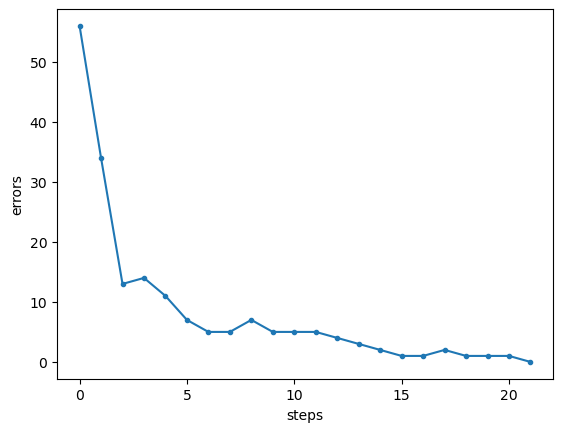

In [6]:
w, err, errs, ep = perceptron_code.train_perceptron(X, y, learn_bias=learn_bias, lr=lr, num_epochs=num_epochs,
                                                    print_every=print_every, verbose=True, parallel=True)

plt.plot(errs, '.-');
plt.xlabel('steps')
plt.ylabel("errors");

## Convergence of the perceptron learning rule

Depending on the data, there may be many or few solutions to the learning problem (or none at all).

Any $w$ for which $ w \cdot x^\mu>0$ for all $\mu$ is a solution to the learning problem, or
$\min_\mu w\cdot x^\mu >0$ Note, that the perceptron does not depend on the magnitude of $w$. Thus, we define
$$D(w)=\frac{1}{\|w\|}\min_\mu w \cdot x^\mu$$

where $\|w\|^2=\sum_{i=1}^{n} w_i^2$.

Better solutions have a larger $D(w)$: $\frac{w}{\|w\|} \cdot x^\mu$ is the distance of the point $x^\mu$ from the hyperplane orthogonal to $w$.

We thus define the best solution as $D_\text{max}=\max_w D(w)$. When $D_\text{max}>0$ the problem is linearly separable, otherwise it is not.

## Convergence of Perceptron rule

Assume that the problem is linearly separable, so that there is a solution $w^*$ with $D(w^*)>0$.

Suppose we performed $t$ iterations of the learning rule. In each iteration, a pattern $\mu$ was presented that either changed $w$ or not.

Denote by $M^\mu$ the number of times pattern $\mu$ has been presented and caused a non-zero update of $w$. If we start with the initial value $w=0$, after $t$ iterations
$$w=\eta \sum_\mu M^\mu x^\mu$$

Denote by $M=\sum_\mu M^\mu$ the total number of non-zero updates of $w$. We will prove that
$$A(w)=\frac{w \cdot w^*}{\|w\|\|w^*\|} \ge \mathcal{O}(\sqrt{M})$$

If the learning rule does not converge, $w$ will be updated forever, $M\to \infty$, and $A\to \infty$.

However, $A(w)=\cos\theta\le 1$ and cannot grow forever. The conclusion is that $M$ must stay finite. This means that after a finite number of updates of $w$ there are no more changes.

Thus, the perceptron learning rule converges in a finite number of steps when the problem is linearly separable.

## Convergence of Perceptron rule

We can bound
$$w\cdot w^*=\eta \sum_\mu M^\mu x^\mu \cdot w^* \ge \eta\sum_\mu M^\mu \min_\nu x^\nu \cdot w^* =\eta M \min_\nu x^\nu \cdot w^* = \eta M D(w^*) \|w^*\|$$

Consider the change of $|w|^2_\mu$ when updating with a single pattern $\mu$:

$$\Delta \|w\|^2_\mu=\|w+\eta x^\mu\|^2-\|w\|^2=2\eta w \cdot x^\mu + \eta^2 \|x^\mu\|^2\le \eta^2 \|x^\mu\|^2$$

where in the inequality we used that $w\cdot x^\mu<0$, because otherwise there would have been no update and $\Delta \|w\|_\mu^2=0$. Thus, at iteration $t$:
$$\|w\|^2=\sum_\mu M^\mu \Delta \|w\|^2_\mu\le \eta^2 \sum_\mu M^\mu \|x^\mu\|^2 \le \eta^2 M B$$
or equivalently
$$\|w\|\le \eta \sqrt{MB}$$
where we define $B=\max_\mu \|x^\mu\|^2$, which is a constant.
Thus,
$$A(w)=\frac{w\cdot w^*}{\|w\|\|w^*\|} \ge \sqrt{\frac{M}{B}}D(w^*)$$

We can invert this relation to bound the total number of weight updates:
$$M \le \frac{B}{D^2(w^*)}\propto \frac{N}{D^2(w^*)}$$
since $B=\max_\mu |x^\mu|^2=\mathcal{O}(N)$. The convergence is slower for higher dimensional problems and also for harder problems, for which $D(w^*)\gtrsim 0$.

## Capacity of the Perceptron

The perceptron can only learn linearly separable problems. How often will one encounter a linearly separable problem in practice? In the following analysis we will consider random problems for which we can compute some answers.

Consider $P$ patterns in $N$ dimensions (we are interested in the large $N$ behaviour and therefore we ignore the component $\phi_0=1$ and $w_0$):
$$\phi^\mu=(\phi_1^\mu,...,\phi_N^\mu),\quad \mu=1,...,P$$

We assume that the $N$-dimensional vectors $\phi^\mu$ are in **general position**: any subset of $N$ or fewer points are linearly independent. Such condition which avoids situations where a subset of patterns are exactly on a linear subspace. When $\phi^\mu$ are generated at random, they are in general position **with probability one**.

We assign each pattern $\phi^\mu$ a random label $t^\mu=+1$ or $t^\mu=-1$. This defines a binary classification problem. What is the probability that this problem is linearly separable?

## Capacity of the Perceptron

Each pattern can be either $+1$ or $-1$, therefore each set of $P$ patterns defines $2^P$ classification problems.

The perceptron defines a hyperplane in $N$ dimensions through the origin $\sum_{i=1}^N w_i \phi_i=0$. Which fraction of the $2^P$ possible classification problems is linearly separable?

Examples

  * $N=2,P=2$. The total number of problems is $2^P=4$. They are all linearly separable.
  * $N=2, P=3$. The total number of problems is $2^P=8$. There are 2 problems that are not linearly separable.
  * $N=3, P=3$. The total number of problems is $2^P=8$. They are all linearly separable.
  * ...

Example of a separable (left) and non separable (right) problem in $N=2$ dimension with $P=3$ points:

<center><img src="figs/dichotomy_2d.png" width=600></center>

## Capacity of the Perceptron

#### Theorem (Cover 1966)
The number of linearly separable labelings of $P$ points in $N$ dimensions with separability plane through the origin is:
$$C(P,N)=2 \sum_{i=0}^{N-1}\binom{P-1}{i}$$

In the exercise you will show that:
* when $P\le N$, then $C(P,N)=2^P$: all problems are linearly separable;
* when $P=2N$, then $C(P,N)=2^{P-1}$: 50% of all problems are linearly separable.

When $P,N\to \infty$ there is a sharp transition at $P=2N$.

The probability for a random labeling of $P$ points in $N$ dimensions to be linearly separable is thus expressed by $C(P,N)/2^P$.

The transition to a negligible probability is sharper and sharper as $N$ and $P$ grow. In the figure $N = 5$ (large dots), $N = 50$ (small dots) and $N = 500$ (line)

<center><img src="figs/prob_linear_separability.png" width=600></center>

[figure taken from _Engel, Van den Broeck, Statistical mechanics of learning (2001)_]

## Proof of Theorem
#### By induction

Suppose the number of linearly separable problem with $P$ patterns in $N$ dimensions is $C(P,N)$. In the image we have $P=4$, the two blue and two red points.

<center><img src="figs/perceptron_theorem_points.png" width=400></center>

We add one point $X$ (the green point) and wish to compute $C(P+1,N)$.
The set $C(P,N)$ consists of linearly separable problems, which we can divide in two subsets:

  * **Set A** (left panel): a separating hyperplane that can be drawn through $X$. For each of these problems we can define two new linearly separable problems by coloring the green point either red or blue, by slightly rotating the separating plane one way or the other [Note that no other point will cross the hyperplane due to such small rotation, since the points are in general position];
  * **Set B** (right panel): For each of these problems we can define only one separable problem.

We thus have:
$$C(P+1,N)=2 A + B= (A+B)+A=C(P,N) + A$$

The set $A$ is the set of linearly separable problems on $P$ points in $N$ dimensions, where the separating hyperplane goes through the origin $O$ and through the point $X$. We can count the size of $A$ by projecting points on the hyperplane orthogonal to the line $O-X$, thereby reducing the dimensions to $N-1$. Therefore we have the recurrence relation:
$$A=C(P,N-1)$$Thus$$C(P+1,N)=C(P,N)+C(P,N-1)$$

One can then start from the two obvious relations
$$C(1,N)=2$$ (any hyperplane not passing through a single point can assign it a label $+1$ or $-1$, depending on its orientation) and $$C(P,1)=2$$ (the only available hyperplane passing through the origin in $1$ dimension is the origin) to arrive at
$$C(P,N)=2 \sum_{i=0}^{N-1}\binom{P-1}{i}$$

We can check that the expression respects the recursion. Indeed:
\begin{align*}
C(P,N)+C(P,N-1)= & 2\sum_{i=0}^{N-1}\binom{P-1}{i}+2\sum_{i=0}^{N-2}\binom{P-1}{i}=\\
 & 2\binom{P-1}{0}+2\sum_{i=1}^{N-1}\left[\binom{P-1}{i}+\binom{P-1}{i-1}\right]=\\
 & 2\sum_{i=0}^{N-1}\binom{P}{i}=C(P+1,N)
\end{align*}

## Generalization

Given inputs $x=(x_1,...,x_n)$ and binary output $y$.
Suppose we wish to learn a given, but unknown, function $\bar{f}: x\to y$ from data.
Denote our solution as $f:x\to y$.

An example is that $\bar{f}$ is some linearly separable classifier from which we have some data.
$f$ is our perceptron solution.

Define the generalization performance of any function $f$ as
$$g(f)=\text{Prob}(f(x)=\bar{f}(x))\qquad \text{$x$ is uniform random}$$Also, define the performance of $f$ on a training set of $P$ patterns$$g_P(f)=\text{Prob}(f(x)=\bar{f}(x)) \qquad \text{$x$ is uniform from training set of size $P$}$$
We do not know $g(f)$ but we do know $g_P(f)$ because we have the training set.

## Generalization

There exists a theorem that allows us to estimate $g(f)$ from $g_P(f)$:
$$\text{Prob}\left(\max_f|g_P(f)-g(f)|> \epsilon\right) \le 4 m(2P)e^{-\epsilon^2 P/8}$$
So, if we can make the right hand side small, say $0.01$ and we find perfect performance on the training set $g_P(f)=1$, we know that the generalization performance $g(f)> 1-\epsilon$ with probability $0.99$.

$m(P)$ is called the **growth function**: it counts the number of different binary functions on $P$ inputs that can be realized by our learning architecture.
In the case of the perceptron $m(P)=C(N,P)$ is the number of linearly separable functions.

## Generalization

In general $m(P) = 2^P$ for $P\le d_\text{VC}$ and becomes polynomial in $P$ for $P> d_\text{VC}$. $d_\text{VC}$ is called the VC (Vapnik-Cervonenkis) dimension.

Note, that we need $P \> d_\text{VC}$ in order to make the rhs $m(2P)e^{-\epsilon^2 P/8}$ of the bound small.

One can prove that the polynomial growth of $m(P)$ is bounded as:
$$m(P)\le \left(\frac{e P}{d_\text{VC}}\right)^{d_\text{VC}}\qquad P> d_\text{VC}$$

as a direct result of the so-called **Sauer's lemma**.

For more:
* https://en.wikipedia.org/wiki/Vapnik%E2%80%93Chervonenkis_dimension
* Mohri, Rostamizadeh, Talwalkar, [Foundations of Machine Learning](https://cs.nyu.edu/~mohri/mlbook/).

## Generalization for the perceptron

For the perceptron $m(P)=C(N,P)$ and $d_\text{VC}=N$.

We can then estimate that when $P,N$ are large, we need
$$P\gtrsim \frac{N}{\epsilon^2}\quad \to \quad |g_P(f)-g(f)|<\epsilon$$
Thus we need $\mathcal{O}(N)$ training samples for good generalization of the perceptron (but with a pretty large prefactor $1/\epsilon^2$\!)

#### Proof

Using $d_\text{VC}=N$, the bound on the growth factor is $m(2P)\le \left(\frac{2e P}{N}\right)^{N}$.
The right hand side of the generalization bound
$$4 m(2P) \exp\left(-\frac{\epsilon^2 P}{8}\right) \le 4\exp \left(N \left(\log(2e\alpha) -\frac{\alpha \epsilon^2}{8}\right)\right)$$
with $\alpha=P/N$.
The right hand side is small when the term in the exponent becomes negative, which occurs for sufficiently large $\alpha$.
An analysis of the function $f(\alpha)=\log(2e\alpha) -\frac{\alpha \epsilon^2}{8}$ shows that it crosses zero when $\alpha =\alpha_c \propto \frac{1}{\epsilon^2}$. Thus
$$\alpha \gtrsim \alpha_c \qquad P_c = N \alpha_c \gtrsim \frac{N}{\epsilon^2}$$

# Appetizer for Advanced Machine Learning

### Generalization in the teacher-student perceptron

The **typical** generalization error of a **student** perceptron trained on labels generated by a **teacher** perceptron on random inputs can be computed exactly in the limit of large $N$, due to [concentration](https://en.wikipedia.org/wiki/Concentration_of_measure) in high dimension. The pioneering work of [Elizabeth Gardner](https://en.wikipedia.org/wiki/Elizabeth_Gardner_(physicist)) laid the foundations for the Statistical Mechanics of Learning, using methods from disordered systems (spin glasses) to study the typical behaviour of learning algorithms as well as fundamental limits in inference problems.

Find an appetizer of part of the course Advanced Machine Learning in the following section about generalization in the **teacher-student** setting.

In [7]:
# solve the theory spanning over α

αs = np.arange(1, 20, 1)
Rs = np.zeros(len(αs))
gen_errors = np.zeros(len(αs))

R0 = 0.3
for iα, α in enumerate(αs):
    R = optimize.fsolve(perceptron_code.eqR, R0, args=(α)).item()
    gen_errors[iα] = perceptron_code.compute_gen_error(R)
    Rs[iα] = R
    R0 = R

In [8]:
# generate teacher vector and test patterns
N = 200
Ptest = 10000
T, Xtest, ytest_sign = perceptron_code.generate_teacher_and_test_set(Ptest, N)

# set parameters
lr = 0.1
num_epochs = 1000
print_every = 1e10
parallel = True
renormalize = True
learn_bias = False

α_span = np.arange(1, 20, 1)
w_span = np.zeros((len(α_span), N))
normw_span = np.zeros(len(α_span))
err_span = np.zeros(len(α_span))
ov_span = np.zeros(len(α_span))
gen_err_span = np.zeros(len(α_span))

for iα, α in enumerate(α_span):

    print(f"doing α: {α}")
    
    P = int(α * N)
    X = np.random.randn(P, N)
    y = 1. * (X @ T > 0)

    w, err, errs, ep = perceptron_code.train_perceptron(X, y, learn_bias=learn_bias, lr=lr, num_epochs=num_epochs,
                                                        print_every=print_every, parallel=parallel, renormalize=renormalize)
    w_span[iα] = w
    normw_span[iα] = (w**2).sum()
    err_span[iα] = err
    ov_span[iα] = w @ T / N
    gen_err_span[iα] = 1 - (np.sign(Xtest @ w) * ytest_sign > 0).sum() / Ptest

doing α: 1
doing α: 2
doing α: 3
doing α: 4
doing α: 5
doing α: 6
doing α: 7
doing α: 8
doing α: 9
doing α: 10
doing α: 11
doing α: 12
doing α: 13
doing α: 14
doing α: 15
doing α: 16
doing α: 17
doing α: 18
doing α: 19


#### Visualize training error

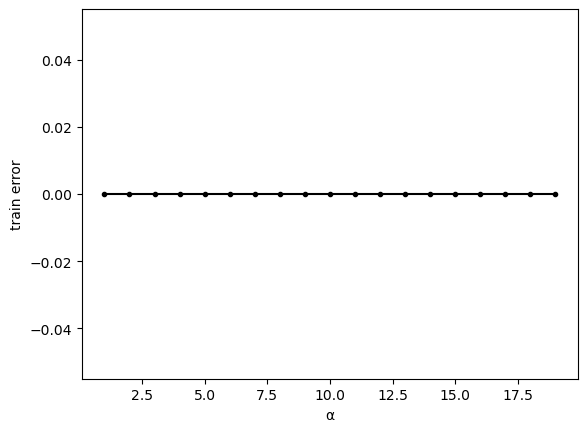

In [9]:
plt.plot(α_span, err_span, '.-', color='black', label='train error');
plt.xlabel('α');
plt.ylabel('train error');

#### Visualize overlap and generalization error again theoretical results

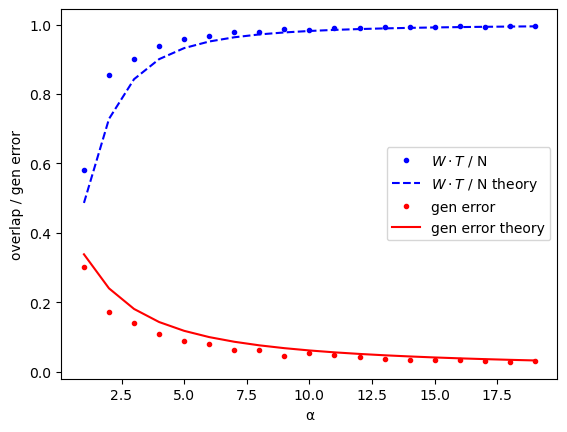

In [10]:
plt.plot(α_span, ov_span, '.', color='blue', label="$W \cdot T$ / N")
plt.plot(αs, Rs, '--', color='blue', label="$W \cdot T$ / N theory");

plt.plot(α_span, gen_err_span, '.', color='red', label="gen error");
plt.plot(αs, gen_errors, color='red', label="gen error theory");

plt.legend();
plt.xlabel('α');
plt.ylabel('overlap / gen error');

# <center>Assignments</center>

#### Ex 4.1

In this exercise we look at some special cases of the perceptron capacity
$$
C(P,N)=2 \sum_{i=0}^{N-1}\binom{P-1}{i}
$$
to better understand the behaviour of $C$.
* Show that all problems with $P \leq N$ are linearly separable.
* Show that exactly half of the problems with $P=2N$ are linearly separable.

Hints:
* In the formula, the convention is $\binom{n}{0}=1$; $\binom{n}{k}=0$ when $n<k$ assumed.
* The formula $(1+\alpha)^n= \sum_{i=0}^n \binom{n}{i} \alpha^i$ may come in handy.

#### Ex 4.2

In this exercise we numerically check the formula $C(N,P)$ for the number of linearly separable problems.
* Write a computer program that implements the perceptron learning rule. Take as data $P$ random input vectors of dimension $N$ with binary components. Take as outputs random assignments $\pm 1$.
* Take $N=50$. Test empirically for individual problems that when $P < 2N$ the rule converges almost always and for $P > 2N$ the rule converges almost never.
* Reconstruct the curve $C(P,N)$ for $N=50$ as a function of $P$ in the following way. For each $P$ construct a number (`nruns`) of learning problems randomly and compute
  1. the fraction of these problems for which the perceptron learning rule converges;
  2. the mean and std of the classification error on the training set;
  3. the mean and std of the number of iterations until convergence.

Suggestions: Use $P=10,20,30, \dots, 120$; Take `nruns=100`. Decide that the algorithm does not converge when 1000 iterations has been reached.

In [3]:
seed=42
if seed is not None:
    np.random.seed(seed)

def train_perceptron(X,y,max_epochs=1000, learning_rate=1, P=8, N=50):
    w = np.zeros(N)
    b = 0.0
    
    history = [[],[]]
    for epoch in range(max_epochs):
        errors = 0
        for i in range(P):
            x_i, y_i = X[i], y[i]
            activation = np.dot(x_i,w) + b
            y_pred = 1 if activation >= 0 else -1
            
            if y_pred != y_i:
                w += learning_rate * y_i * x_i
                b += learning_rate * y_i
                errors += 1
        
        history[0].append(epoch+1)
        history[1].append(errors)
        if errors == 0:
            return 0.0, epoch+1
    
    final_activation = np.sign(np.dot(X,w) + b)
    error_fraction = np.mean(final_activation != y)
    return error_fraction, max_epochs

In [11]:
def draw_plots(P_values, convergence_fraction, mean_error, std_error, mean_iterations, std_iterations):
    plt.figure(figsize=(14, 4))

    # 1. Convergence fraction
    plt.subplot(1, 3, 1)
    plt.plot(P_values, convergence_fraction, marker='o')
    plt.axvline(2 * N, linestyle="--")
    plt.xlabel("P")
    plt.ylabel("Fraction of converged runs")
    plt.title("Convergence Fraction vs P")
    plt.grid(True)

    # 2. Mean training error with std
    plt.subplot(1, 3, 2)
    plt.errorbar(P_values, mean_error, yerr=std_error, marker='o', capsize=5)
    plt.xlabel("P")
    plt.ylabel("Mean training error")
    plt.title("Training Error vs P")
    plt.grid(True)

    # 3. Mean iterations with std
    plt.subplot(1, 3, 3)
    plt.errorbar(P_values, mean_iterations, yerr=std_iterations, marker='o', capsize=5)
    plt.xlabel("P")
    plt.ylabel("Mean iterations until convergence")
    plt.title("Iterations vs P")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

In [12]:
errors_list = []
iterations_list = []
nruns = 100
convergence_fraction = []
mean_error = []
std_error = []
mean_iterations = []
std_iterations = []
N=50


for p in range(10,121,10):
    convergence_count = 0
    for run in range(nruns):
        X = np.random.choice([-1, 1], size=(p, N))
        y = np.random.choice([-1, 1], size=p)
        error_frac, iterations = train_perceptron(X,y,P=p)
        errors_list.append(error_frac)
        iterations_list.append(iterations)
        if error_frac == 0.0:
            convergence_count += 1
    convergence_fraction.append(convergence_count / nruns)
    mean_error.append(np.mean(errors_list))
    std_error.append(np.std(errors_list))
    mean_iterations.append(np.mean(iterations_list))
    std_iterations.append(np.std(iterations_list))

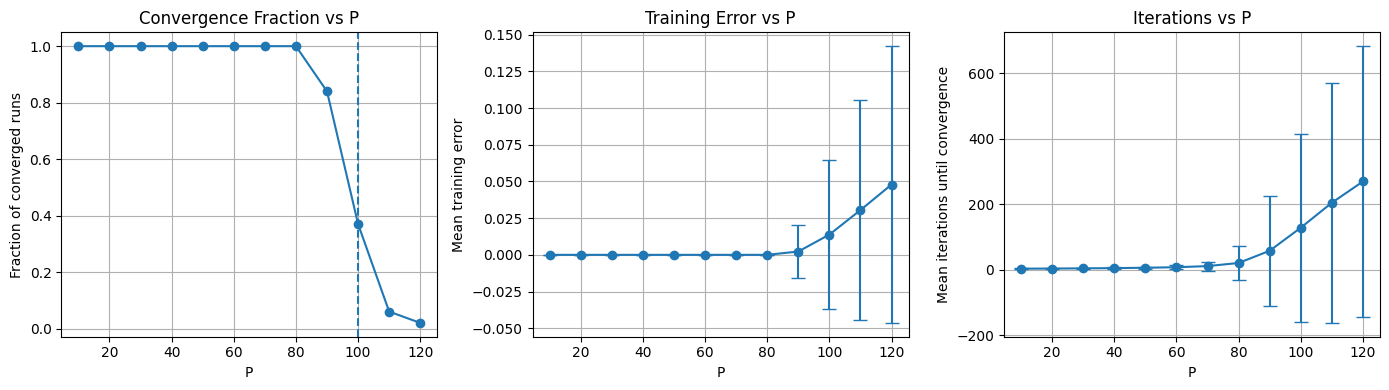

In [13]:
draw_plots(range(10,121,10), convergence_fraction, mean_error, std_error, mean_iterations, std_iterations)

The fraction of the total number of patterns converged are plotted against the number of training patterns $(P)$ in the plot above. The dashed vertical line represents $P=2N=100$.

* For $P < 2N$, the fraction which converges is close to 1, meaning that almost every random labeling is linearly separable.

* The fraction drops sharply around $P = 2N$.

* For $P > 2N$, the fraction approaches 0, showing that the separability is not easily possible.

In the graph where the average training error across all runs, where the vertical lines represent one standard deviation is plotted,

* When $P$ is small, the average error is 0, i.e. all problems are separable.

* As $P$ gets close to $2N$ the average error increases, and it rises quickly after $P$ passes $2N$, showing that multiple runs start becoming non-separable.

In the plot showing the average number of iterations required for the runs to converge.

* For small $P$, the convergence occurs very quickly, requiring at most a few epochs.

* Around $P = 2N$, the problems become harder to separate. Hence, the average number of epochs increase.

* For $P > 2N$, the runs rarely reach convergence, as most of them fail to find a separator in the span of 1000 runs.

#### Ex 4.3

The number of linearly separable problems of $P$ patterns in $N$ dimensions is given by $C(N,P)$. We know that $C(N,P)=2^P$ when $P \leq N$. When $P>N$ we can use the bound
$$
C(N,P)\le \left(\frac{e P}{N}\right)^{N}
$$
Compute numerically $C(N,P)$ and its bound for $N=50$ and for $P=1$ to $P=200$.

#### Ex 4.4

The generalization bound is quite conservative. In this exercise we will verify this numerically for the perceptron. We define
$$
\delta = 4 m(2P) \exp\left(-\frac{\epsilon^2 P}{8}\right)
$$
and put it for instance to $\delta =0.01$. We can then ask what the error $\epsilon$ is for given $N$ and $P$.
We can compare this error with the generalization error that we find by numerical simulation.

In particular, suppose that data is generated from a so-called **teacher perceptron**, which is specified by an $N$ dimensional weight vector $w^\text{teacher}$. The input data are $P$
binary vectors, each of dimension $N$. So we can define the input data as a matrix $\xi$ of size $N \times P$.
We generate a training set by defining output labels $y_j = \text{sign}\left(\sum_{i=1}^N \xi_{ij} w^\text{teacher}_i\right)$.

The training data are used to train another perceptron (the so-called **student perceptron**). By construction the problem is linearly separable and therefore the perceptron learning rule will always converge and the solution will perfectly separate the two classes. Thus, in terms of the generalization bound, the student solution implements a function $f$ with $g_P(f)=1$. The probability that the generalization performance $g(f)$ of this solution is larger than $1-\epsilon$ is given by the generalization bound.

We can get a numerical estimate of the generalization error, by generating a separate test set of $P_\text{test}$ patterns with labels again computed from the teacher perceptron. The generalization error is the fraction of test patterns that are incorrectly classified by the student perceptron solution.

The student solution $f$ is not unique. Starting with a different initial weight vector, a different converged solution $f$ is obtained. In order to get a reliable numerical estimate of the generalization error, we should run the perceptron learning rule many times with different initial weight vectors and compute the average generalization error.

* Using the formula for $\delta$ above, compute an expression of $\epsilon$ in terms of $N$ and $P$ and $\delta=0.01$. Approximate $m(P)=C(N,P)$ by its bound as given in **Ex 4.3**. Compute numerically for $N=10$ the dependence of $\epsilon$ on $P$. Compute the number of patterns $P$ to ensure that $\epsilon \approx 0.1$.
  Repeat this for $N=20,30,40,50$. Note that the required number of patterns scales linearly with $N$.

* Estimate the generalization error for the teacher student perceptron learning scenario as described above. In more detail:
    - Generate input training data $\xi$ of size $N \times P$ with $\xi_{ij}$ binary $\pm 1$;
    - Define a random (but fixed) teacher vector $w^\text{teacher}$: `w_0=randn(1,n)`;
    - Compute the teacher labels $y_j$ as defined above;
    - Generate in the same way a test set $\xi_\text{test}$ of size $N \times P_\text{test}$ with $P_\text{test}=10.000$ and teacher labels;
    - Compute `n_learning_runs=100` perceptron solutions by training on the training set with $P$ samples with different initial weight vectors $w$. After convergence, the training error should be zero ($g_P(f)=1$) but the solutions are different. Compute for each solution the generalization error on the test set $\epsilon$. Use $N=10$ and $P=10,50,100,500,1000$;
    - Make a table where you compare your numerical estimates for $\epsilon$ with those given by the generalization bound ($\delta=0.01$).

$ \delta = 4 m(2P) \exp\left(-\frac{\epsilon^2 P}{8}\right) $

$ \frac{\delta}{4 m(2P)} = \exp\left(-\frac{\epsilon^2 P}{8}\right) $

$ -\frac{\epsilon^2 P}{8} = ln\frac{\delta}{4 m(2P)}$

$ \epsilon^2= \frac{8}{P}ln\frac{4 m(2P)}{\delta}$

$ \epsilon= \sqrt{\frac{8}{P}ln\frac{4 m(2P)}{\delta}}$

$ \epsilon= \sqrt{\frac{8}{P}ln\frac{4 m(2P)}{0.01}}$

$ \epsilon= \sqrt{\frac{8}{P}ln 4m(2P) \cdot 10^2}$

$ \delta = 4 m(2P) \exp\left(-\frac{\epsilon^2 P}{8}\right) $

$m(P) = C(N,P)\le \left(\frac{e P}{N}\right)^{N}$

$m(2P) = C(N,2P)\le \left(\frac{2eP}{N}\right)^{N}$

$ \delta \le 4\left(\frac{2eP}{N}\right)^{N}  \exp\left(-\frac{\epsilon^2 P}{8}\right) $

$\exp\left(\frac{\epsilon^2 P}{8}\right) = \frac{4}{\delta}\left(\frac{2eP}{N}\right)^{N}$

$\epsilon^2 = \frac{8}{P}ln\left(\frac{4}{\delta}\right)+\frac{8N}{P}ln\left(\frac{2eP}{N}\right)$

$\epsilon = \sqrt{\frac{8}{P}ln\left(\frac{4}{\delta}\right)+\frac{8N}{P}ln\left(\frac{2eP}{N}\right)}$



In [15]:
def epsilon_bound_simple(P, N, delta):
    bound = (math.e * 2 * P / N) ** N
    arg = (4.0 * bound) / delta
    val = (8.0 / P) * math.log(arg)
    if val <= 0:
        return float('nan')
    return math.sqrt(val)

N=10
delta = 0.01

P_values = list(range(10, 121, 10))
epsilons = [epsilon_bound_simple(P,N,delta) for P in P_values]

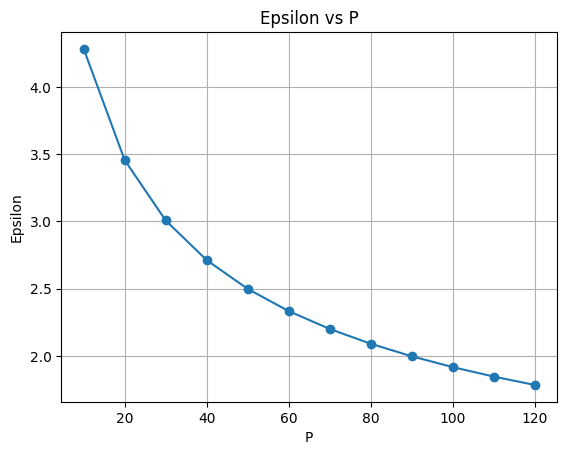

In [4]:
plt.plot(P_values, epsilons, marker='o')
plt.xlabel("P")
plt.ylabel("Epsilon")
plt.title("Epsilon vs P")
plt.grid(True)

You can observe that $\epsilon$ decreases as P increases if we keep the $N=10$ constant.

In [16]:
target = 0.1
min_P = None
P_eps = []
min_P=[[],[]]
for N in range(10, 51, 10):
    P_eps_N = [[],[]]
    for P in range(91000, 500000):
        eps = epsilon_bound_simple(P, N, delta)
        P_eps_N[0].append(P)
        P_eps_N[1].append(eps)
        if not math.isnan(eps) and eps <= target:
            min_P[0].append(N)
            min_P[1].append(P)
            break
    P_eps.append(P_eps_N)

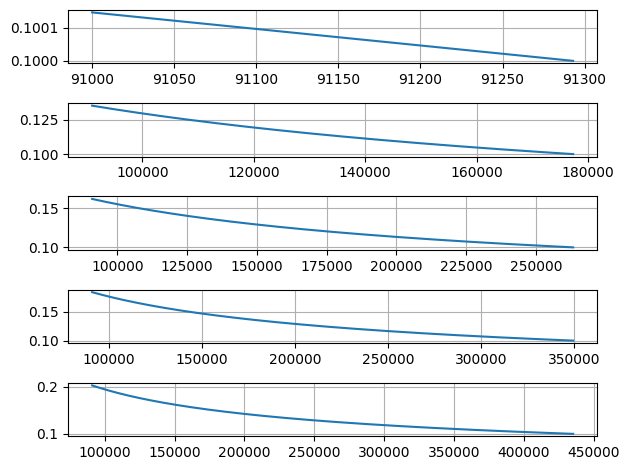

In [18]:
fig, ax = plt.subplots(5, 1)
for N in range(5):
    ax[N].plot(P_eps[N][0], P_eps[N][1])
    ax[N].grid(True)
fig.tight_layout()

We plot P against $\epsilon$ and we see that for each N we get similar graphs but the graph keeps shifting in a linear manner as evident in the next graph where P is plotted against N

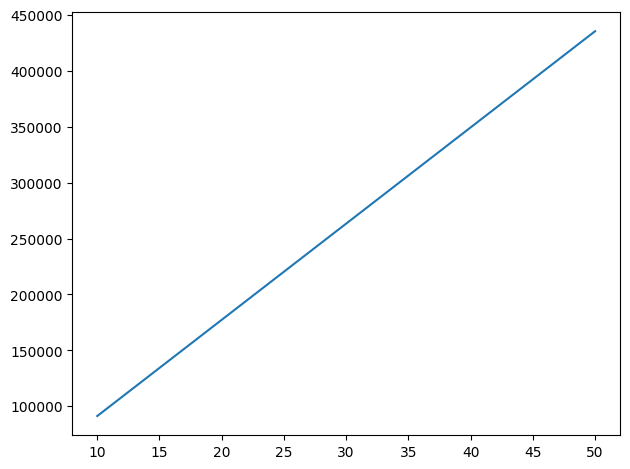

In [19]:
fig, ax = plt.subplots(1, 1)
ax.plot(min_P[0], min_P[1])
fig.tight_layout()

In [14]:
P_test = 10000
xi_test = np.random.choice([-1, 1], size=(P_test,N))
w_0 = np.random.randint(0,N, size=N)
y_test = []
for j in range(P_test):
    activation = np.sum(np.dot(xi_test[j],w_0))
    y_test.append(1 if activation >= 0 else -1)
dataset_test = [xi_test, y_test]

In [15]:
P_list=[10,50,100,500,1000]
results = [[],[]]
n_learning_runs = 100
empirical = []
theory = []

def perceptron_train_solution(X, y, max_epochs=1000, learning_rate=1):
    """
    Train perceptron until convergence.
    X: shape (P, N)
    y: shape (P,)
    Returns final weight vector of shape (N,)
    """
    P, N = X.shape
    run_solutions = []
    for _ in range(n_learning_runs):
        b = 0.0
        w = np.random.randn(N)   # random init
        for _ in range(max_epochs):
            errors = 0
            for i in range(P):
                x_i, y_i = X[i], y[i]
                activation = np.dot(x_i,w) + b
                y_pred = 1 if activation >= 0 else -1
                
                if y_pred != y_i:
                    w += learning_rate * y_i * x_i
                    b += learning_rate * y_i
                    errors += 1
            if errors == 0:
                break
        run_solutions.append((w,b))
    return run_solutions

for P in P_list:
    print("P=",P)
    xi = np.random.choice([-1, 1], size=(P,N))
    y=[]
    for j in range(P):
        activation = np.sum(np.dot(xi[j],w_0))
        y.append(1 if activation >= 0 else -1)
    solutions = perceptron_train_solution(xi,y)
    
    gen_errors = []
    for (w,b) in solutions:
        y_pred = np.sign(xi_test @ w + b)
        y_pred[y_pred == 0] = 1
        error = np.mean(y_pred != dataset_test[1])
        gen_errors.append(error)
    empirical.append(np.mean(gen_errors))
    theory.append(epsilon_bound_simple(P,N,delta))

P= 10
P= 50
P= 100
P= 500
P= 1000


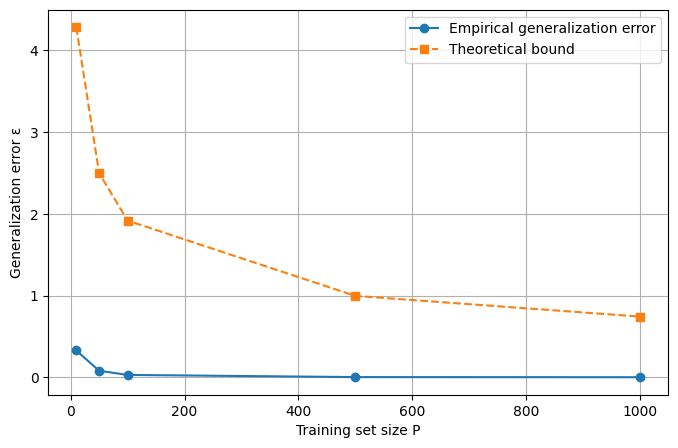

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(P_list, empirical, 'o-', label="Empirical generalization error")
plt.plot(P_list, theory, 's--', label="Theoretical bound")
plt.xlabel("Training set size P")
plt.ylabel("Generalization error ε")
plt.legend()
plt.grid(True)
plt.show()

In [36]:
empirical_data = pd.DataFrame([empirical], columns=P_list)
theoretical_data = pd.DataFrame([theory], columns=P_list)

In [37]:
empirical_data

,10,50,100,500,1000
0,0.328394,0.080409,0.029469,0.002941,0.001354


In [38]:
theoretical_data

,10,50,100,500,1000
0,4.28233,2.498554,1.917264,0.996339,0.74283
